## Convolution Neural Networks

1. Implement convolution operation for a sample image of shape (H=6, W=6, C=1) with a 
random kernel of size (3,3) using torch.nn.functional.conv2d.

In [103]:
import math
import torch
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss

In [104]:
image = torch.rand(6,6)
print('image = ', image)

image =  tensor([[0.9042, 0.1685, 0.0168, 0.2828, 0.9228, 0.1715],
        [0.5985, 0.3664, 0.7256, 0.8542, 0.4800, 0.3190],
        [0.7560, 0.7380, 0.3244, 0.9700, 0.1790, 0.5778],
        [0.1963, 0.4627, 0.7059, 0.9004, 0.9859, 0.4096],
        [0.9372, 0.3218, 0.3700, 0.9602, 0.9262, 0.9760],
        [0.0780, 0.1357, 0.1765, 0.2765, 0.6937, 0.0067]])


In [105]:
# pytorch expects 4d tensor for conv2D
image = image.unsqueeze(dim = 0)
print('image.shape = ', image.shape)
image = image.unsqueeze(dim = 0)
print('image.shape = ', image.shape)

image.shape =  torch.Size([1, 6, 6])
image.shape =  torch.Size([1, 1, 6, 6])


In [106]:
print('image = ', image)

image =  tensor([[[[0.9042, 0.1685, 0.0168, 0.2828, 0.9228, 0.1715],
          [0.5985, 0.3664, 0.7256, 0.8542, 0.4800, 0.3190],
          [0.7560, 0.7380, 0.3244, 0.9700, 0.1790, 0.5778],
          [0.1963, 0.4627, 0.7059, 0.9004, 0.9859, 0.4096],
          [0.9372, 0.3218, 0.3700, 0.9602, 0.9262, 0.9760],
          [0.0780, 0.1357, 0.1765, 0.2765, 0.6937, 0.0067]]]])


In [107]:
kernel = torch.ones(3,3)
kernel = kernel.unsqueeze(dim = 0)
kernel = kernel.unsqueeze(dim = 0)
print('kernel = ', kernel)

kernel =  tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]])


In [108]:
outimage = F.conv2d(image, kernel, stride=1, padding=0)
print('outimage = ', outimage)
print('outimage.shape = ', outimage.shape)

outimage =  tensor([[[[4.5983, 4.4466, 4.7555, 4.7571],
          [4.8738, 6.0475, 6.1252, 5.6758],
          [4.8123, 5.7532, 6.3218, 6.8850],
          [3.3841, 4.3096, 5.9951, 6.1351]]]])
outimage.shape =  torch.Size([1, 1, 4, 4])


In [109]:
def op_shape(input,kernel, padding, stride):
    return math.floor(((input-kernel + 2*padding)/stride)+1)

In [110]:
# varying stride
for s in range(1,4):
    outimage = F.conv2d(image, kernel, stride=s, padding=0)
    print('padding = 0, stride = {} : shape = {}'.format( s, outimage.shape))
    print('manual = ', op_shape(6,3,0,s))

padding = 0, stride = 1 : shape = torch.Size([1, 1, 4, 4])
manual =  4
padding = 0, stride = 2 : shape = torch.Size([1, 1, 2, 2])
manual =  2
padding = 0, stride = 3 : shape = torch.Size([1, 1, 2, 2])
manual =  2


In [111]:
# varying padding
for p in range(1,4):
    outimage = F.conv2d(image, kernel, stride=1, padding=p)
    print('padding = {}, stride = 1 : shape = {}'.format( p, outimage.shape))
    print('manual = ', op_shape(6,3,p,1))

padding = 1, stride = 1 : shape = torch.Size([1, 1, 6, 6])
manual =  6
padding = 2, stride = 1 : shape = torch.Size([1, 1, 8, 8])
manual =  8
padding = 3, stride = 1 : shape = torch.Size([1, 1, 10, 10])
manual =  10


In [112]:
print('Number of parameters is ', kernel.numel())

Number of parameters is  9


2. Apply torch.nn.Conv2d to the input image of Qn 1 with out-channel=3 and observe the 
output. Implement the equivalent of torch.nn.Conv2d using the torch.nn.functional.conv2D 
to get the same output. You may ignore bias.

In [113]:
import torch
import torch.nn as nn
import torch.nn.functional as F

image = torch.tensor([[[[0.2517, 0.5768, 0.9246, 0.1770, 0.3891, 0.6804],
          [0.8635, 0.5554, 0.8212, 0.7538, 0.7803, 0.8810],
          [0.8095, 0.1976, 0.2323, 0.0450, 0.3380, 0.3387],
          [0.2954, 0.2963, 0.1823, 0.2339, 0.9487, 0.2513],
          [0.7728, 0.9064, 0.6118, 0.9394, 0.5194, 0.3010],
          [0.1860, 0.3665, 0.1029, 0.9466, 0.9219, 0.4264]]]])

In [114]:
conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=0, bias=False)
kernel = conv.weight
print('kernel parameters for 3 channels: ', kernel)

kernel parameters for 3 channels:  Parameter containing:
tensor([[[[ 0.0173, -0.1287,  0.2598],
          [ 0.1672, -0.1871,  0.1390],
          [ 0.1087,  0.1387,  0.1585]]],


        [[[ 0.0637,  0.2431, -0.1166],
          [-0.1377,  0.0585,  0.2176],
          [-0.0028, -0.1985,  0.2478]]],


        [[[-0.2266, -0.0065, -0.1006],
          [ 0.0595, -0.3144, -0.3321],
          [ 0.0537, -0.3095,  0.1487]]]], requires_grad=True)


In [115]:
print("Output image using torch.nn.Conv2d: ")
out_img = conv(image)
print(out_img)

Output image using torch.nn.Conv2d: 
tensor([[[[ 0.4772,  0.0418,  0.2841,  0.3377],
          [ 0.3896,  0.1902,  0.4000,  0.3297],
          [ 0.3750,  0.3655,  0.4837,  0.1637],
          [ 0.1464,  0.4143,  0.5069,  0.3474]],

         [[ 0.1568,  0.3409,  0.2315,  0.1768],
          [ 0.0305,  0.1643,  0.3769,  0.0956],
          [ 0.0583,  0.1933,  0.1218,  0.0923],
          [ 0.1015,  0.3644,  0.0818,  0.1027]],

         [[-0.5329, -0.6847, -0.6483, -0.6560],
          [-0.4218, -0.2890, -0.3036, -0.7243],
          [-0.4923, -0.1692, -0.6453, -0.4799],
          [-0.6176, -0.4137, -0.7201, -0.4630]]]],
       grad_fn=<ConvolutionBackward0>)


In [116]:
out_img = F.conv2d(image,kernel, stride=1, padding=0)
print("Output image using torch.nn.functional.Conv2d: ")
print(out_img)

Output image using torch.nn.functional.Conv2d: 
tensor([[[[ 0.4772,  0.0418,  0.2841,  0.3377],
          [ 0.3896,  0.1902,  0.4000,  0.3297],
          [ 0.3750,  0.3655,  0.4837,  0.1637],
          [ 0.1464,  0.4143,  0.5069,  0.3474]],

         [[ 0.1568,  0.3409,  0.2315,  0.1768],
          [ 0.0305,  0.1643,  0.3769,  0.0956],
          [ 0.0583,  0.1933,  0.1218,  0.0923],
          [ 0.1015,  0.3644,  0.0818,  0.1027]],

         [[-0.5329, -0.6847, -0.6483, -0.6560],
          [-0.4218, -0.2890, -0.3036, -0.7243],
          [-0.4923, -0.1692, -0.6453, -0.4799],
          [-0.6176, -0.4137, -0.7201, -0.4630]]]],
       grad_fn=<ConvolutionBackward0>)


3. Implement CNN for classifying digits in MNIST dataset using PyTorch. Display the 
classification accuracy in the form of a Confusion matrix. Verify the number of learnable 
parameters in the model

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST

In [2]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(128, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2)
        )
        self.classification_head = nn.Sequential(
            nn.Linear(64, 20, bias=True),
            nn.ReLU(),
            nn.Linear(20, 10, bias=True)
        )            
        
    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(features.shape[0], -1))

In [3]:
mnist_trainset = datasets.MNIST(root="./data",download = True,train=True,transform=ToTensor())
train_loader = DataLoader(mnist_trainset,batch_size=50,shuffle=True)
mnist_testset = datasets.MNIST(root="./data",download = True,train=False,transform=ToTensor())
test_loader = DataLoader(mnist_testset,batch_size=50,shuffle=True)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNClassifier().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size=50

In [5]:
total_params = 0
for name,param in model.named_parameters():
    params = param.numel()
    total_params += params

In [6]:
for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")


[1,   100] loss: 2.310
[1,   200] loss: 2.301
[1,   300] loss: 2.293
[1,   400] loss: 2.285
[1,   500] loss: 2.269
[1,   600] loss: 2.246
[1,   700] loss: 2.209
[1,   800] loss: 2.130
[1,   900] loss: 1.962
[1,  1000] loss: 1.582
[1,  1100] loss: 1.206
[1,  1200] loss: 0.945
[2,   100] loss: 0.772
[2,   200] loss: 0.662
[2,   300] loss: 0.586
[2,   400] loss: 0.500
[2,   500] loss: 0.464
[2,   600] loss: 0.406
[2,   700] loss: 0.383
[2,   800] loss: 0.358
[2,   900] loss: 0.316
[2,  1000] loss: 0.288
[2,  1100] loss: 0.290
[2,  1200] loss: 0.294
[3,   100] loss: 0.259
[3,   200] loss: 0.255
[3,   300] loss: 0.236
[3,   400] loss: 0.223
[3,   500] loss: 0.205
[3,   600] loss: 0.220
[3,   700] loss: 0.223
[3,   800] loss: 0.219
[3,   900] loss: 0.220
[3,  1000] loss: 0.195
[3,  1100] loss: 0.194
[3,  1200] loss: 0.197
[4,   100] loss: 0.201
[4,   200] loss: 0.181
[4,   300] loss: 0.178
[4,   400] loss: 0.168
[4,   500] loss: 0.161
[4,   600] loss: 0.173
[4,   700] loss: 0.175
[4,   800] 

In [7]:
correct,total = 0,0
mat = [[0 for _ in range(10)] for _ in range(10)]
for i,vdata in enumerate(test_loader):
    tinputs,tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model(tinputs)

    _,predicted = torch.max(toutputs,1)
    total += tlabels.size(0)
    correct += (predicted==tlabels).sum()
    for i in range(len(predicted)):
        mat[predicted[i].item()][tlabels[i].item()] += 1
        
print(f"Correct = {correct}, Total = {total}")

Correct = 9716, Total = 10000


In [8]:
for i in range(10):
    print(mat[i]) 

[967, 0, 9, 0, 3, 3, 9, 2, 3, 4]
[1, 1128, 0, 1, 0, 0, 3, 6, 1, 2]
[1, 2, 991, 8, 0, 0, 0, 18, 3, 0]
[0, 2, 3, 980, 0, 4, 0, 2, 4, 2]
[2, 0, 3, 0, 963, 1, 7, 0, 5, 14]
[3, 0, 2, 7, 0, 874, 9, 1, 9, 10]
[3, 1, 2, 0, 2, 3, 928, 0, 2, 0]
[1, 0, 18, 7, 2, 2, 0, 989, 5, 6]
[2, 2, 4, 4, 2, 4, 2, 4, 930, 5]
[0, 0, 0, 3, 10, 1, 0, 6, 12, 966]


In [12]:
torch.save(model, './models/mnist_model.pt')

4. Modify CNN of Qn. 3 to reduce the number of parameters in the network. Draw a plot of 
percentage drop in parameters vs accuracy.

In [124]:
class CNNClassifier(nn.Module):
    def __init__(self,i):
        super(CNNClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 2**i, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(2**i, 2**(i+1), kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(2**(i+1), 2**i, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2)
        )
        self.classification_head = nn.Linear(2**i, 10, bias=True)
        
    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(features.shape[0], -1))        

In [125]:
def train(model, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

In [126]:
def test(model):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    return 100. * correct / len(test_loader.dataset)

In [127]:
EPOCHS = 5
BATCH_SIZE_TRAIN = 64
BATCH_SIZE_TEST = 1000
LR = 0.01
LOG_INTERVAL = 100
RANDOM_SEED = 1
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(RANDOM_SEED)

In [128]:
train_dataset = MNIST('data/', train=True, download=True, transform=ToTensor())
test_dataset = MNIST('data/', train=False, download=True, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE_TEST, shuffle=True)

In [129]:
n_params = []
acc = []

for i in range(1, 7):
    print(f'Model Number {i}:')
    model = CNNClassifier(i).to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=LR)
    
    total_params = 0
    for param in model.parameters():
        total_params += param.numel()
    print('\tTotal Params: ', total_params)
    for epoch in range(1, EPOCHS + 1):
        print(f'\tTraining Epoch {epoch}')
        train(model, epoch)

    accuracy = test(model)
    print(f'\tTesting Accuracy: {accuracy}')
    n_params.append(total_params)
    acc.append(accuracy.item())
    print(f'\tFinished Training and Testing Model {i}\n')

Model Number 1:
	Total Params:  200
	Training Epoch 1
	Training Epoch 2
	Training Epoch 3
	Training Epoch 4
	Training Epoch 5
	Testing Accuracy: 41.59000015258789
	Finished Training and Testing Model 1

Model Number 2:
	Total Params:  678
	Training Epoch 1
	Training Epoch 2
	Training Epoch 3
	Training Epoch 4
	Training Epoch 5
	Testing Accuracy: 69.55999755859375
	Finished Training and Testing Model 2

Model Number 3:
	Total Params:  2498
	Training Epoch 1
	Training Epoch 2
	Training Epoch 3
	Training Epoch 4
	Training Epoch 5
	Testing Accuracy: 89.12000274658203
	Finished Training and Testing Model 3

Model Number 4:
	Total Params:  9594
	Training Epoch 1
	Training Epoch 2
	Training Epoch 3
	Training Epoch 4
	Training Epoch 5
	Testing Accuracy: 93.63999938964844
	Finished Training and Testing Model 4

Model Number 5:
	Total Params:  37610
	Training Epoch 1
	Training Epoch 2
	Training Epoch 3
	Training Epoch 4
	Training Epoch 5
	Testing Accuracy: 95.1500015258789
	Finished Training and

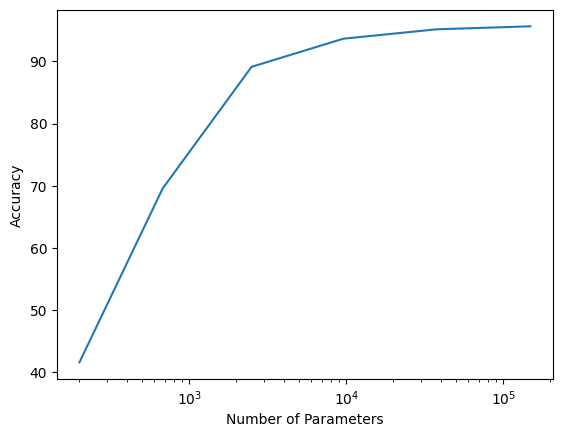

In [130]:
import matplotlib.pyplot as plt
plt.plot(n_params, acc)
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()